In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from rna_folding.parsing import gpmap_to_dict
from rna_folding.utils import dotbracket_to_bp

In [2]:

path = "/home/lgold/phd/research/projects/connectivity/rna_folding/experiments/RNA12/suboptimal2_randomranking/"
gp_map_nussi7 = gpmap_to_dict(gpmap_file=path + "bp_graph7/" + "gp_map.txt", genotype_file=path + "genotypes.txt")

In [18]:
gp_map_nussi7_1000 = dict(random.sample(gp_map_nussi7.items(), 100000))

In [4]:
ph_distr_nussi7 = {}
for ph_list in gp_map_nussi7.values():
    ph_list = set(ph_list)
    for ph in ph_list:
        if ph in ph_distr_nussi7:
            ph_distr_nussi7[ph] += 1
        else:
            ph_distr_nussi7[ph] = 1


In [5]:
trans_dict = {"L": "A", "J": "U", "M": "G", "K": "C"}
gp_map_nussi7_1000_augc = {}
for g in gp_map_nussi7_1000:
    new_g = "".join([trans_dict[i] for i in g])
    gp_map_nussi7_1000_augc[new_g] = gp_map_nussi7_1000[g]


In [6]:
print(gp_map_nussi7_1000_augc)

{'AUAAUAUCACAC': ['............', '......(...).', '....(.....).', '.(........).', '....(...)...', '.(......)...', '.(..(...).).', '..(...).....', '(.....).....', '.((...)...).', '.((...).)...', '.(...)......', '.(...)(...).', '((...)).....', '(...).......', '(...).(...).'], 'GCACUUGUUGGA': ['............', '.......(...)', '.....(.....)', '.....(.....)', '....(......)', '.....(....).', '....(.....).', '...(......).', '.(........).', '....((....))', '.....(...)..', '....(....)..', '...(.....)..', '.(.......)..', '....((...).)', '....((...)).', '...(.(...)).', '...((....)).', '.(...(...)).', '.(..(....)).', '.(.(.....)).', '..(.....)...', '(.......)...', '.((.....).).', '.((.....))..', '..(....)....', '(......)....', '.((....)..).', '.((....).)..', '(.(....))...', '.(....).....', '.(....)(...)', '((....).)...', '((....))....', '(....)......', '(....).(...)', '(...).......', '(...)..(...)', '(...)(.....)', '(...)(.....)', '(...)(....).', '(...)(...)..'], 'GACUAAGGGCAA': ['...(.......)', '.

In [7]:
vienna_gp_map = gpmap_to_dict("/home/lgold/phd/research/projects/connectivity/rna_folding/experiments/RNA12/canonical_viennaRNA/gp_map.txt", "/home/lgold/phd/research/projects/connectivity/rna_folding/experiments/RNA12/canonical_viennaRNA/genotypes.txt")


In [8]:
vienna_ph_distr_f = open("/home/lgold/phd/research/projects/connectivity/rna_folding/experiments/RNA12/canonical_viennaRNA/phenotype_distribution.txt", "r")
vienna_ph_distr = {}
for line in vienna_ph_distr_f:
    line_ = line.strip().split(" ")
    vienna_ph_distr[line_[0]] = int(line_[1])

vienna_ph_distr_f.close()


16777216


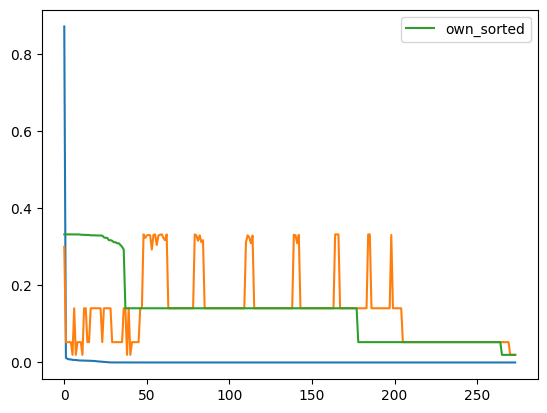

In [9]:
# del vienna_ph_distr["."*12]
# del ph_distr_nussi7["."*12]
g_sum = 16777216
p_sorted = [p for d, p in sorted(zip(vienna_ph_distr.values(), vienna_ph_distr.keys()), reverse=True)]

v_sum = sum(vienna_ph_distr.values())
n_sum = sum(ph_distr_nussi7.values())
y1 = [vienna_ph_distr[p]/v_sum for p in p_sorted]
y2 = [] 
for p in p_sorted:
    try:
        y2.append(ph_distr_nussi7[p]/g_sum)
    except KeyError:
        y2.append(0)
for p in ph_distr_nussi7:
    if p not in vienna_ph_distr:
        y1.append(0)
        y2.append(ph_distr_nussi7[p]/g_sum)

print(v_sum)
p_sorted2 = [p for d, p in sorted(zip(ph_distr_nussi7.values(), ph_distr_nussi7.keys()), reverse=True)]
y3 = [ph_distr_nussi7[p]/g_sum for p in p_sorted2]

plt.plot(list(range(len(y1))), y1)
plt.plot(list(range(len(y1))), y2) 
plt.plot(list(range(len(y3))), y3, label="own_sorted")
plt.legend() 

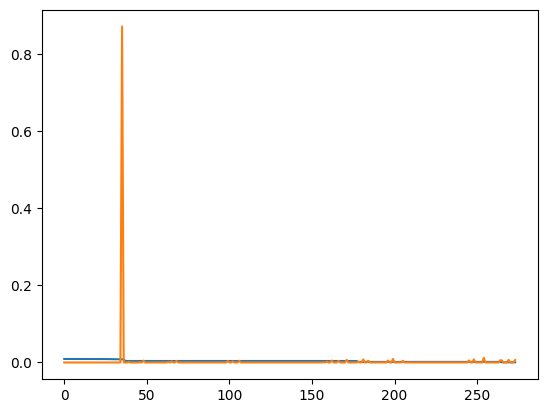

In [10]:

p_sorted = [p for d, p in sorted(zip(ph_distr_nussi7.values(), ph_distr_nussi7.keys()), reverse=True)]

v_sum = sum(vienna_ph_distr.values())
n_sum = sum(ph_distr_nussi7.values())
y1 = [ph_distr_nussi7[p]/n_sum for p in p_sorted]
y2 = [] 
for p in p_sorted:
    try:
        y2.append(vienna_ph_distr[p]/g_sum)
    except KeyError:
        y2.append(0)
# for p in ph_distr_nussi7:
#     if p not in vienna_ph_distr:
#         y1.append(0)
#         y2.append(ph_distr_nussi7[p]/n_sum)
 
plt.plot(list(range(len(y1))), y1)
plt.plot(list(range(len(y1))), y2) 

In [11]:
seq1 = [1, 2, 3]
seq2 = [2, 3]
seq3 = [2, 1, 3]
seq4 = [1, 3, 2]

seqs = [seq1, seq2, seq3, seq4]

N=10000
# seqs = [np.random.choice(40, replace=False, size=15) for i in range(N)]

ph_lists = list(gp_map_nussi7.values())

seq_ids = np.random.choice(1000, size=N)

seqs = [ph_lists[id] for id in seq_ids]

cons_matrix = np.zeros(shape=(len(seqs), len(seqs)))
cons_matrix[:] = np.nan

for i in range(0, len(seqs)):
    for j in range(i+1, len(seqs)):
        if seqs[i][0] == seqs[j][0]:
            cons_matrix[i, j] = 1
        elif seqs[i][0] not in seqs[j] or seqs[j][0] not in seqs[i]:
            cons_matrix[i, j] = 1
        else:
            cons_matrix[i, j] = 0

s = np.nan_to_num(cons_matrix).sum()
print(s, (N*(N-1)/2))

49995000.0 49995000.0


In [12]:
gp_map_nussi7_1000_augc

{'AUAAUAUCACAC': ['............',
  '......(...).',
  '....(.....).',
  '.(........).',
  '....(...)...',
  '.(......)...',
  '.(..(...).).',
  '..(...).....',
  '(.....).....',
  '.((...)...).',
  '.((...).)...',
  '.(...)......',
  '.(...)(...).',
  '((...)).....',
  '(...).......',
  '(...).(...).'],
 'GCACUUGUUGGA': ['............',
  '.......(...)',
  '.....(.....)',
  '.....(.....)',
  '....(......)',
  '.....(....).',
  '....(.....).',
  '...(......).',
  '.(........).',
  '....((....))',
  '.....(...)..',
  '....(....)..',
  '...(.....)..',
  '.(.......)..',
  '....((...).)',
  '....((...)).',
  '...(.(...)).',
  '...((....)).',
  '.(...(...)).',
  '.(..(....)).',
  '.(.(.....)).',
  '..(.....)...',
  '(.......)...',
  '.((.....).).',
  '.((.....))..',
  '..(....)....',
  '(......)....',
  '.((....)..).',
  '.((....).)..',
  '(.(....))...',
  '.(....).....',
  '.(....)(...)',
  '((....).)...',
  '((....))....',
  '(....)......',
  '(....).(...)',
  '(...).......',
  '(...)..(..

In [ ]:
gp_map_nussi7_1000 = dict(random.sample(gp_map_nussi7.items(), 10000))
trans_dict = {"L": "A", "J": "U", "M": "G", "K": "C"}
gp_map_nussi7_1000_augc = {}
for g in gp_map_nussi7_1000:
    new_g = "".join([trans_dict[i] for i in g])
    gp_map_nussi7_1000_augc[new_g] = gp_map_nussi7_1000[g]


D = dict([("(..)", [1, 2, 3]),
("(...", [1, 2]),
("....", [2, 3]),
("...)", [1, 4, 3])])

D = {}
for gt in gp_map_nussi7_1000_augc:
    for ph in gp_map_nussi7_1000_augc[gt]:
        if ph in D:
            D[ph].append(gt)
        else:
            D[ph] = [gt]

ref_gp_map = {1:"(...", 2:"....", 3:"....", 4:"...)"}
ref_gp_map = vienna_gp_map


gp_map_sub = {}
for ph in D:
    for gt in D[ph]:
        if gt in gp_map_sub:
            gp_map_sub[gt].append(ph)
        else:
            gp_map_sub[gt] = [ph]

In [52]:
phenos = list(i[0] for i in D.keys())
print(len(phenos))

A = np.zeros(shape=(len(phenos), len(phenos)))

# Loop over upper triangle of matrix
for i in range(len(phenos)):
    for j in range(i+1,len(phenos)):
        gt_intersect = set(D[phenos[i]]).intersection(D[phenos[j]])  # get genotypes that map to both phenos
        # print(gt_intersect)
        for gt in gt_intersect:
            if ref_gp_map[gt] == phenos[i]:
                A[i, j] += 1
            elif ref_gp_map[gt] == phenos[j]:
                A[j, i] += 1
print(A.sum())
if A.sum() > 1:

    def position(element, rank, ranking, pair_ranking):
        shift = 0
        if rank+shift == len(ranking):
            ranking.append([element])

        if pair_ranking[element, ranking[rank]].sum() > 0:  # if ranking above at least one of the current rank
            shift = -1
        if pair_ranking[ranking[rank], element].sum() > 0:
            if shift == -1:
                raise ValueError(f"Inconsistent ranking between element {element} and elements {ranking[rank]}")
            else:
                shift = 1

        if shift == 0:
            ranking[rank].append(element)
        
        elif shift == -1:       # insert as new rank above current rank
            ranking.insert(rank, [element])
        
        
        elif shift == 1:   # continue search at next position
            if rank+shift == len(ranking):  # reached end, so append
                ranking.append([element])
            else:
                position(element, rank=rank+1, ranking=ranking, pair_ranking=pair_ranking)  # search next pos
        
    ranking = [[0]]
    for ph in range(1, len(phenos)):
        position(ph, rank=0, ranking=ranking, pair_ranking=A)



274
0.0


In [ ]:
ranking_ph = []
for i in ranking:
    ranking_ph.append([phenos[j] for j in i])

print(len(ranking_ph))

1


In [26]:
for i in ranking_ph:
    print(len(i))

274


In [40]:

# D = dict([("(..)", ["AAA", "BBB", "CCC"]),
# ("(...", ["AAA", "BBB"]),
# ("....", ["BBB", "CCC"]),
# ("...)", ["AAA", "DDD", "CCC"])])

# ref_gp_map = {"AAA":"(...", "BBB":"....", "CCC":"....", "DDD":"...)"}

# gp_map = {}
# for ph in D:
#     for g in D[ph]:
#         if ph in gp_map:
#             gp_map[g].append(ph)
#         else:
#             gp_map[g] = [ph]

# gp_map_sub = {}
# for ph in D:
#     for gt in D[ph]:
#         if gt in gp_map_sub:
#             gp_map_sub[gt].append(ph)
#         else:
#             gp_map_sub[gt] = [ph]

# phenos = list(D.keys())

# A = np.zeros(shape=(len(phenos), len(phenos)))

# # Loop over upper triangle of matrix
# for i in range(len(phenos)):
#     for j in range(i+1,len(phenos)):
#         gt_intersect = set(D[phenos[i]]).intersection(D[phenos[j]])  # get genotypes that map to both phenos
#         for gt in gt_intersect:
#             if ref_gp_map[gt] == phenos[i]:
#                 A[i, j] += 1
#             elif ref_gp_map[gt] == phenos[j]:
#                 A[j, i] += 1



# def position(element, rank, ranking, pair_ranking):
#     shift = 0
#     if rank+shift == len(ranking):
#         ranking.append([element])

#     if pair_ranking[element, ranking[rank]].sum() > 0:  # if ranking above at least one of the current rank
#         shift = -1
#     if pair_ranking[ranking[rank], element].sum() > 0:
#         if shift == -1:
#             raise ValueError(f"Inconsistent ranking between element {element} and elements {ranking[rank]}")
#         else:
#             shift = 1

#     if shift == 0:
#         ranking[rank].append(element)
    
#     elif shift == -1:       # insert as new rank above current rank
#         ranking.insert(rank, [element])
    
    
#     elif shift == 1:   # continue search at next position
#         if rank+shift == len(ranking):  # reached end, so append
#             ranking.append([element])
#         else:
#             position(element, rank=rank+1, ranking=ranking, pair_ranking=pair_ranking)  # search next pos
    
# ranking = [[0]]
# for ph in range(1, len(phenos)):
#     position(ph, rank=0, ranking=ranking, pair_ranking=A)



In [41]:
ranking_ph = []
for i in ranking:
    ranking_ph.append([phenos[j] for j in i])

print(ranking_ph)

[['....'], ['(...'], ['(..)', '...)']]
